<a href="https://colab.research.google.com/github/cyber-Olga-2077/UMF/blob/main/Case2Krzyczkowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [346]:
!pip install surprise

from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wgranie danych

In [347]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [348]:
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Przeląd danych

In [349]:
ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [350]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [351]:
movies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [352]:
print(33 in set(movies["movieId"]))
#print(movies.head())

False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ZADANIE 1
*   Podaj liczbę filmów dla dzieci




In [353]:
movies['is_child_friendly'] = movies['genres'].str.contains('Children')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [354]:
grouped_movies = movies.groupby('is_child_friendly').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [355]:
print(f'Liczba filmów dla dzieci: {grouped_movies}')

Liczba filmów dla dzieci: is_child_friendly
False    9078
True      664
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


W naszym zbiorze danych mamy 664 filmy dla dzieci i 9078, których młode umysły pochłaniać nie powinny.



*   Pokaż rozkład ocen filmów z 1995




In [356]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies_1995 = movies[movies['year'] == '1995']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [357]:
ratings_1995 = ratings[ratings['movieId'].isin(movies_1995['movieId'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [358]:
rating_distribution = ratings_1995['rating'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [359]:
print(rating_distribution)

rating
0.5      50
1.0     254
1.5      75
2.0     522
2.5     244
3.0    1701
3.5     467
4.0    1625
4.5     308
5.0     898
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


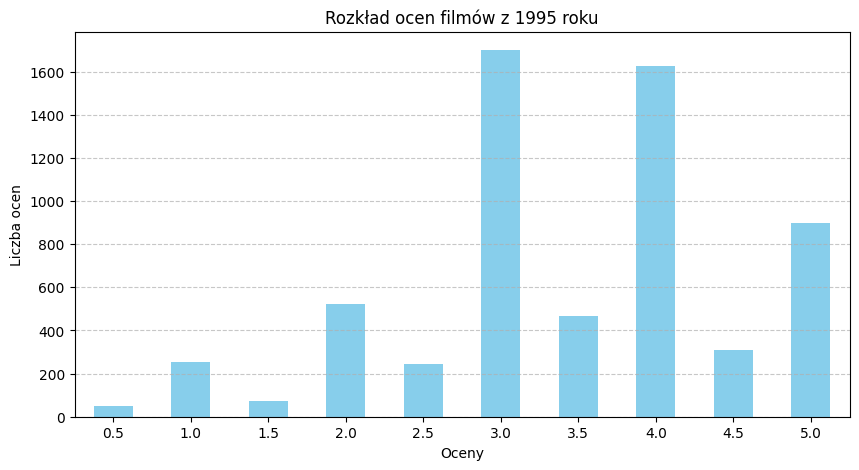

In [360]:
plt.figure(figsize=(10, 5))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Oceny')
plt.ylabel('Liczba ocen')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Rozkład ocen filmów jest multimodalny: najwięcej mamy filmów przeciętnych (3.0) oraz dobrych (4.0). Zadziwiającą tendencją wśród użytkowników jest preferowanie pełnych ocen (w sensie liczb całkowitych) ponad połówki punktów.

*   Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane




In [361]:
action_movies = movies[movies['genres'].str.contains('Action')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [362]:
action_movies_ratings = pd.merge(action_movies, ratings, on='movieId')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [363]:
average_rating_action = action_movies_ratings['rating'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [364]:
action_movies_average_ratings = action_movies_ratings.groupby('movieId').agg({
    'rating': 'mean',
    'title': 'first'
}).rename(columns={'rating': 'average_rating'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [365]:
top_rated_action_movies = action_movies_average_ratings.sort_values(by='average_rating', ascending=False).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [366]:
print(f'Średnia ocen filmów akcji: {average_rating_action}')
print('Trzy najwyżej oceniane filmy akcji:')
print(top_rated_action_movies[['title', 'average_rating']])

Średnia ocen filmów akcji: 3.447984331646809
Trzy najwyżej oceniane filmy akcji:
                                                     title  average_rating
movieId                                                                   
72142               Love Exposure (Ai No Mukidashi) (2008)             5.0
138632                                  Tokyo Tribe (2014)             5.0
115727   Crippled Avengers (Can que) (Return of the 5 D...             5.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Średnia ocen filmów akcji to 3,4, a trzy najwyżej oceniane filmy są prawdopodoobnie mało znanymi produkcjami niszowymi.

ZADANIE 2 System rekomendacyjny



*   Czym różni się algorytm kNN with means od standardowego kNN?







Algorytmy kNN (k-najbliższych sąsiadów) i kNN z środkami różnią się głównie sposobem obliczania podobieństwa między elementami, takimi jak filmy lub produkty w sklepie.

Standardowy kNN działa podobnie do znalezienia najbliższych rzeczy wokół konkretnego miejsca na mapie. W przypadku filmów algorytm poszuka innych użytkowników, którzy również ocenili ten sam film na 4 gwiazdki, a następnie zobaczy, jakie inne filmy oni wysoko ocenili. To tak, jakby zapytać swoich sąsiadów, który film im się podobał, jeśli obaj widzieliśmy ten sam film.

kNN with means jest nieco bardziej złożony, ponieważ bierze pod uwagę różnice w sposobach oceny filmów przez różnych ludzi. Generaliści są bardziej skłonni do przyznawania wysokich ocen, podczas gdy krytycy są bardziej krytyczni i rzadko przyznają wysokie oceny. Najpierw kNN with means określa średnią ocenę każdego użytkownika, a następnie wykorzystuje te dane do dostosowania ocen. Dzięki temu możemy wziąć pod uwagę indywidualne skale ocen użytkowników, gdy porównujemy ich. To tak, jakby zamiast pytać sąsiadów, które filmy lubią, najpierw dowiedzieć się, czy są zazwyczaj łatwi do zadowolenia, czy też są bardziej wybredni, a dopiero potem zadać im pytanie.

Podsumowując, główną różnicą jest to, że kNN with measn zmienia oceny na podstawie średnich ocen użytkowników, zanim zacznie szukać podobieństw między nimi. Z tego powodu może być dokładniejszy, zwłaszcza w przypadkach, gdy oceny ludzi są bardzo różnie.

Dodanie nowego użytkownika z dwoma opiniami NES III na 4 gwiazki i Pi na 3 gwiazdki + wczytanie danych do datasetu



In [367]:
new_user_id = max(ratings["userId"]) + 1
ratings_with_new_user = ratings._append({"userId": new_user_id, "movieId": movies[movies['title'] == "NeverEnding Story III, The (1994)"]['movieId'].iloc[0], "rating": 4}, ignore_index=True)
ratings_with_new_user = ratings_with_new_user._append({"userId": new_user_id, "movieId": movies[movies['title'] == "Pi (1998)"]['movieId'].iloc[0], "rating":3}, ignore_index=True)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_with_new_user[['userId', 'movieId', 'rating']], reader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zdefiniowanie parametrów dla grid searchu

In [368]:
param_grid = {
    'k': list(range(3, 11)),
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True, False]
    }
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zdefiniowanie grid searchu

In [369]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Przeprowadzenie grid searchu

In [370]:
gs.fit(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

Wypisanie wyników grid searchu

In [371]:
print("Najlepsze parametry: ", gs.best_params['rmse'])
print("Najlepszy wynik RMSE: ", gs.best_score['rmse'])

Najlepsze parametry:  {'k': 10, 'sim_options': {'name': 'msd', 'user_based': True}}
Najlepszy wynik RMSE:  0.9154010237825566


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stwirzenie trainsetu ze wszystkich daych i antysetu przefiltrowanego w celu predykcji opinii dla stworzonego wcześniej nowego użytkownika

In [372]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

new_user_antiset = [item for item in antiset if item[0] == new_user_id];

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Definicja KnnMean z wykorzystaniem wyniku grid searchu oraz walidacja krzyżowa

In [373]:
knnMean = KNNWithMeans(k=gs.best_params['rmse']['k'])
cvKnnmean = cross_validate(knnMean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9040  0.9047  0.9034  0.9082  0.9070  0.9055  0.0018  
MAE (testset)     0.6926  0.6944  0.6935  0.6964  0.6949  0.6944  0.0013  
Fit time          0.12    0.15    0.15    0.15    0.15    0.14    0.01    
Test time         0.99    0.99    1.30    0.98    1.76    1.20    0.30    


Trenowanie i wykonanie predykcji oraz posortaawanie jej w celu uzyskania rekomendacji

In [374]:
knnMean.fit(trainset)
recommendationsKnnMeans = list(pd.DataFrame(knnMean.test(new_user_antiset)).merge(movies , left_on = ['iid'], right_on = ['movieId']).sort_values("est", ascending=False).head(10)["title"])
print("\n".join(recommendationsKnnMeans))

Computing the msd similarity matrix...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done computing similarity matrix.
Man with the Golden Arm, The (1955)
3 Women (Three Women) (1977)
Come and See (Idi i smotri) (1985)
Rain (2001)
Polar Express, The (2004)
Mulholland Dr. (1999)
Pale Rider (1985)
Silence (2016)
Lady Jane (1986)
Angels and Insects (1995)


Definicja SVD i przeprowadzenie walidacji krzyżowej

In [375]:
svd = SVD()
cvSvd = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8773  0.8756  0.8739  0.8739  0.8674  0.8736  0.0033  
MAE (testset)     0.6727  0.6747  0.6732  0.6697  0.6670  0.6715  0.0028  
Fit time          1.87    1.21    1.20    1.24    1.17    1.34    0.27    
Test time         0.19    0.12    0.39    0.14    0.11    0.19    0.10    


Trenowanie oraz predykcja, sort i rekomendaacja

In [376]:
svd.fit(trainset)
recommendationsSvdMeans = list(pd.DataFrame(svd.test(new_user_antiset)).merge(movies , left_on = ['iid'], right_on = ['movieId']).sort_values("est", ascending=False).head(10)["title"])
print("\n".join(recommendationsSvdMeans))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Life Is Beautiful (La Vita è bella) (1997)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Streetcar Named Desire, A (1951)
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Shawshank Redemption, The (1994)
Lawrence of Arabia (1962)
Dark Knight, The (2008)
Star Wars: Episode IV - A New Hope (1977)
One Flew Over the Cuckoo's Nest (1975)
Schindler's List (1993)


Używam KnnWithMeans, bo daje lepsze wyniki RMSE.